In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Reading Image
road = cv2.imread('road_image.png')
processed_image = cv2.imread('processed.png')


In [ ]:

# Making a copy of the image
road_copy = np.copy(road)

# Creating two black images of the same size as the original image
marker_image = np.zeros(road.shape[:2], dtype=np.int32)
segments = np.zeros(road.shape, dtype=np.uint8)

# Function to return tuple of colors
def create_rgb(i):
    x = np.array(cm.tab10(i))[:3] * 255
    return tuple(x)

# Storing Colors
colors = []

# One color for each single digit
for i in range(10):
    colors.append(create_rgb(i))

# Global Variables
# Number of markers
no_markers = 10

# Current marker
current_marker = 1

# Flag
marks_updated = False

# CALLBACK FUNCTION
def mouse_callback(event, x, y, flags, param):
    global marks_updated

    if event == cv2.EVENT_LBUTTONDOWN:
        # TRACKING FOR MARKERS
        cv2.circle(marker_image, (x, y), 5, (current_marker), -1)

        # DISPLAY ON USER IMAGE
        cv2.circle(road_copy, (x, y), 5, colors[current_marker], -1)

        marks_updated = True

# Naming the window and setting the callback function to it
cv2.namedWindow('Road Image')
cv2.setMouseCallback('Road Image', mouse_callback)

while True:
    # Show the two windows
    cv2.imshow('WaterShed Segments', segments)
    cv2.imshow('Road Image', road_copy)


    k = cv2.waitKey(1)
    if k == 27:
        break

    elif k == ord('c'):
        road_copy = road.copy()
        marker_image = np.zeros(road.shape[:2], dtype=np.int32)
        segments = np.zeros(road.shape, dtype=np.uint8)


    elif k > 0 and chr(k).isdigit():
        # chr converts to printable digit
        current_marker = int(chr(k))


    if marks_updated:
        marker_image_copy = marker_image.copy()
        cv2.watershed(road, marker_image_copy)
        segments = np.zeros(road.shape, dtype=np.uint8)

        for color_ind in range(no_markers):
            # COLORING SEGMENTS
            segments[marker_image_copy == (color_ind)] = colors[color_ind]

        marks_updated = False


cv2.destroyAllWindows()

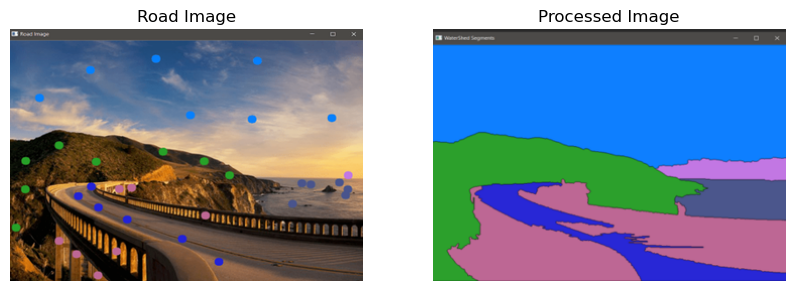